# Data scraping as a basis for Analysis

----

In [1]:
# import of modules

In [2]:
import pandas as pd

In [3]:
import seaborn as sns # graphical use

In [4]:
import matplotlib.pyplot as plt # change size plots
plt.rcParams['figure.figsize'] = [40, 20]

In [5]:
plt.rc('legend',fontsize=20) # using a size in points to change size legend OR --> plt.rc('legend',fontsize='medium')

#### read csv data from disk -- > file "02.csv"

In [6]:
raw_data_cs=pd.read_csv("../resources/02.csv")

#### show the content raw_data_cs

In [7]:
raw_data_cs.head(4) # first 4 position

,Book_Available,Book_Category,Book_First_Link,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
0,True,Travel,https://books.toscrape.com/catalogue/category/...,45.17,2,It's Only the Himalayas,11
1,True,Travel,https://books.toscrape.com/catalogue/category/...,49.43,4,Full Moon over Noah’s Ark: An Odyssey to Mount...,11
2,True,Travel,https://books.toscrape.com/catalogue/category/...,48.87,3,See America: A Celebration of Our National Par...,11
3,True,Travel,https://books.toscrape.com/catalogue/category/...,36.94,2,Vagabonding: An Uncommon Guide to the Art of L...,11


#### create copy befor changing the existing date

In [8]:
df=raw_data_cs.copy()

In [9]:
df.head(4) # first 4 position

,Book_Available,Book_Category,Book_First_Link,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
0,True,Travel,https://books.toscrape.com/catalogue/category/...,45.17,2,It's Only the Himalayas,11
1,True,Travel,https://books.toscrape.com/catalogue/category/...,49.43,4,Full Moon over Noah’s Ark: An Odyssey to Mount...,11
2,True,Travel,https://books.toscrape.com/catalogue/category/...,48.87,3,See America: A Celebration of Our National Par...,11
3,True,Travel,https://books.toscrape.com/catalogue/category/...,36.94,2,Vagabonding: An Uncommon Guide to the Art of L...,11


#### show the contents of the whole file - display the maximum amount: columns and rows without limits

In [10]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

#### show the whole file once more

In [11]:
#display(df).head(4)  --> very big file and not so readable like in Jupyter 

#### show information about the database structure - including: data type, file size, existing columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Book_Available              1000 non-null   bool   
 1   Book_Category               1000 non-null   object 
 2   Book_First_Link             1000 non-null   object 
 3   Book_Price                  1000 non-null   float64
 4   Book_Stars                  1000 non-null   int64  
 5   Book_Title                  1000 non-null   object 
 6   Book_total_category_amouth  1000 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 48.0+ KB


----

##### data cleaning -remove two columns "Book_Available", "Book_First_Link" that are unnecessary for analysis --> axis = 1 - removing columns

In [13]:
df=df.drop(['Book_Available'], axis=1)

In [14]:
df=df.drop(['Book_First_Link'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Book_Category               1000 non-null   object 
 1   Book_Price                  1000 non-null   float64
 2   Book_Stars                  1000 non-null   int64  
 3   Book_Title                  1000 non-null   object 
 4   Book_total_category_amouth  1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [16]:
#raw_data_cs # check one more time - if raw data without any changes

In [17]:
df.head(5) # new working file for use - show only 5 first

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
0,Travel,45.17,2,It's Only the Himalayas,11
1,Travel,49.43,4,Full Moon over Noah’s Ark: An Odyssey to Mount...,11
2,Travel,48.87,3,See America: A Celebration of Our National Par...,11
3,Travel,36.94,2,Vagabonding: An Uncommon Guide to the Art of L...,11
4,Travel,37.33,3,Under the Tuscan Sun,11


----

#### subject 1:  min and max value for kol 'Book_Price'

SELECT MIN(Book_Price) 
FROM df;

SELECT MAX(Book_Price) 
FROM df;

In [18]:
df['Book_Price'].min()

10.0

In [19]:
df['Book_Price'].max()

59.99

#### subject 2:  min and max value for  kol 'Book_Price' in df

In [20]:
#SELECT 
#MIN(Book_Price) as min_price
#FROM df
#ORDER BY min_price
#LIMIT 5;

In [21]:
min_price=sorted(df['Book_Price'].unique())
min_price[:5]

[10.0, 10.01, 10.02, 10.16, 10.23]

#### subject 3:  min and max value for the df and kol 'Book_Stars'

SELECT MIN(Book_Stars) FROM df;

SELECT MAX(Book_Stars) FROM df;

In [22]:
df['Book_Stars'].max()

5

In [23]:
df['Book_Stars'].min()

1

#### subject 4:  dictinct value for Book_Stars

SELECT DISTINCT Book_Stars
FROM df;

In [24]:
pd.unique(df['Book_Stars'])

array([2, 4, 3, 1, 5])

Method nr 2

In [25]:
df['Book_Stars'].unique()

array([2, 4, 3, 1, 5])

In [26]:
len(df['Book_Stars'].unique())

5

SELECT DISTINCT Book_total_category_amouth FROM df;

In [27]:
pd.unique(df['Book_total_category_amouth'])

array([ 11,  32,  26,  75,  19,  35,  17,  65,  29,   7, 110,  13, 152,
        16,   5,  67,  48,   6,  54,  14,   1,   8,   9,  10,  18,  30,
        12,   3,   2,   4])

In [28]:
len(df['Book_total_category_amouth'].unique())

30

In [29]:
amoyth_books_in_every_category=sorted(df['Book_total_category_amouth'].unique())
# show me last 15 
reverse_tab=amoyth_books_in_every_category[::-1] # show me last 15 - sorted from Max to min  
reverse_tab[:15]

[152, 110, 75, 67, 65, 54, 48, 35, 32, 30, 29, 26, 19, 18, 17]

----

In [30]:
df.head(2) # show me tabel again

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
0,Travel,45.17,2,It's Only the Himalayas,11
1,Travel,49.43,4,Full Moon over Noah’s Ark: An Odyssey to Mount...,11


#### subject 5:  show the best five Title Books -- > I’m interested in the Book_Title of the books - with stars 5. Show only first 5 title

SELECT Book_Title
FROM df
WHERE Book_Stars=5
LIMIT 5;

In [31]:
df_title_stars5 = df.loc[df["Book_Stars"] == 5, "Book_Title" ] 
df_title_stars5.head(5)

10                   1,000 Places to See Before You Die
19               A Time of Torment (Charlie Parker #14)
28    What Happened on Beale Street (Secrets of the ...
29    The Bachelor Girl's Guide to Murder (Herringfo...
33                    The Silkworm (Cormoran Strike #2)
Name: Book_Title, dtype: object

#### subject 6:  show the best five or four stars Title Books

SELECT Book_Title
FROM df
WHERE Book_Stars=5 or Book_Stars=4 
LIMIT 3;

In [32]:
df_title_stars4_5_category_Art = df.loc[df["Book_Stars"].isin([4,5])]
df_title_stars4_5_category_Art.head()

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
1,Travel,49.43,4,Full Moon over Noah’s Ark: An Odyssey to Mount...,11
7,Travel,56.88,4,A Year in Provence (Provence #1),11
10,Travel,26.08,5,"1,000 Places to See Before You Die",11
11,Mystery,47.82,4,Sharp Objects,32
13,Mystery,56.50,4,The Past Never Ends,32


#### subject 7:  show the best five  stars Title Books in Category Travel

In [33]:
# SELECT Book_Category, Book_Price, Book_Stars, Book_Title, Book_total_category_amouth
# FROM df
# WHERE Book_Stars=5 and Book_Category="Travel" 

In [34]:
star_5_cat_Travel = df[(df["Book_Stars"] == 5) & (df["Book_Category"] == "Travel")]
star_5_cat_Travel

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
10,Travel,26.08,5,"1,000 Places to See Before You Die",11


#### subject 8:  show the best five  stars Title Books in Category Travel or belong to category Crime (stars is not important)

In [35]:

# SELECT Book_Category, Book_Price, Book_Stars, Book_Title, Book_total_category_amouth
# FROM df
# WHERE Book_Stars=5 and Book_Category="Travel" or and Book_Category="Crime"


In [36]:
star_5_cat_Travel_or_cat_Crime = df[(df["Book_Stars"] == 5) & (df["Book_Category"] == "Travel")| (df["Book_Category"] == "Crime")]
star_5_cat_Travel_or_cat_Crime

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
10,Travel,26.08,5,"1,000 Places to See Before You Die",11
999,Crime,10.97,1,The Long Shadow of Small Ghosts: Murder and Me...,1


----

#### subject 9:  show the worst (1*) books and their price <11.00

In [37]:
# SELECT * FROM df WHERE Book_Stars=1 and Book_Price < 11 order by Book_Price;

In [38]:
a=df[(df["Book_Stars"] ==1) & (df["Book_Price"] < 11.00)]
a.sort_values("Book_Price")

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
840,Psychology,10.40,1,The Lucifer Effect: Understanding How Good Peo...,7
315,Childrens,10.62,1,Counting Thyme,29
605,Science Fiction,10.65,1,The Project,16
18,Mystery,10.69,1,Tastes Like Fear (DI Marnie Rome #3),32
474,Default,10.76,1,Miss Peregrine’s Home for Peculiar Children (M...,152
610,Science Fiction,10.92,1,The Restaurant at the End of the Universe (Hit...,16
999,Crime,10.97,1,The Long Shadow of Small Ghosts: Murder and Me...,1


In [39]:
#SELECT Book_Stars, count(*)
#FROM df
#GROUP BY Book_Stars;

In [40]:
df.groupby("Book_Stars").size()

Book_Stars
1    226
2    196
3    203
4    179
5    196
dtype: int64

In [41]:
226+196+203+179+196

1000

----

#### subject 9a:  I want to group my categories according to the number of stars, and then calculate how many such books are in each item, and what is the average price of them. For example I want to count the number of books and their average price for the "Autobiography" catalog for 1 Book_stars

In [42]:
# SELECT Book_Stars,  COUNT(*), AVG(Book_Price)
#FROM df
#GROUP BY Book_Stars, Book_Category;

In [43]:
import numpy as np
a=df.groupby(["Book_Stars", "Book_Category"]).agg({"Book_Price": [np.size, np.mean]})
a.head(45) # only 45 first result 

Book_Price           
                                    size       mean
Book_Stars Book_Category                           
1          Add a comment            16.0  36.356875
           Autobiography             2.0  34.015000
           Biography                 1.0  39.550000
           Business                  3.0  43.930000
           Childrens                 8.0  32.593750
           Christian                 1.0  25.770000
           Classics                  3.0  40.523333
           Contemporary              2.0  27.905000
           Crime                     1.0  10.970000
           Cultural                  1.0  36.580000
           Default                  33.0  33.662424
           Fantasy                   9.0  37.460000
           Fiction                  13.0  36.896923
           Food and Drink            7.0  35.384286
           Historical                1.0  15.790000
           Historical Fiction        5.0  40.866000
           History                   3.0  34.963333
           Horror                    4.0  37.072500
           Humor                     2.0  34.810000
           Music                     2.0  28.215000
           Mystery                   7.0  20.844286
           New Adult                 1.0  55.850000
           Nonfiction               24.0  35.739167
           Paranormal                1.0  15.400000
           Philosophy                6.0  36.971667
           Poetry                    3.0  39.026667
           Politics                  1.0  56.860000
           Psychology                4.0  25.502500
           Religion                  1.0  27.620000
           Romance                  11.0  32.463636
           Science                   4.0  37.830000
           Science Fiction           7.0  35.237143
           Self Help                 2.0  46.190000
           Sequential Art           13.0  36.420000
           Short Stories             1.0  35.880000
           Spirituality              1.0  20.910000
           Sports and Games          1.0  24.420000
           Thriller                  3.0  22.616667
           Travel                    2.0  26.875000
           Womens Fiction            5.0  34.072000
           Young Adult              11.0  37.200909
2          Academic                  1.0  13.120000
           Add a comment            13.0  39.225385
           Art                       1.0  32.340000
           Autobiography             3.0  26.800000

 check point - result analysis

        1 Books_stars 
        Book_Category --> Autobiography
        books amouth -->2.0
        mean price--> 34.015000

In [44]:
def change_colour(val):
    # I want to mark the field of interest
   return ['background-color: red' if (x== 34.015000)else 'background-color: yellow' for x in val]

name_column_html_1 = a[:4].style.apply(change_colour, axis=1, subset=['Book_Price'])
name_column_html_1

In [1]:
"""
conclusion

I found only this 2 position filter - Book_Category": "Autobiography and Book_Stars": 1,
size = 2.000000 OK
mean = 34.015000

# control - manual- from sourec file --> (27.18+40.85)/2
        "Book_Available": true,
        "Book_Category": "Autobiography",
        "Book_First_Link": "https://books.toscrape.com/catalogue/category/books/autobiography_27/index.html",
        "Book_Price": 27.18,
        "Book_Stars": 1,
        "Book_Title": "M Train",
        "Book_total_category_amouth": 9
    },
    {
        "Book_Available": true,
        "Book_Category": "Autobiography",
        "Book_First_Link": "https://books.toscrape.com/catalogue/category/books/autobiography_27/index.html",
        "Book_Price": 40.85,
        "Book_Stars": 1,
        "Book_Title": "Lab Girl",
        "Book_total_category_amouth": 9
"""

'\nconclusion\n\nI found only this 2 position filter - Book_Category": "Autobiography and Book_Stars": 1,\nsize = 2.000000 OK\nmean = 34.015000\n\n# control - manual- from sourec file --> (27.18+40.85)/2\n        "Book_Available": true,\n        "Book_Category": "Autobiography",\n        "Book_First_Link": "https://books.toscrape.com/catalogue/category/books/autobiography_27/index.html",\n        "Book_Price": 27.18,\n        "Book_Stars": 1,\n        "Book_Title": "M Train",\n        "Book_total_category_amouth": 9\n    },\n    {\n        "Book_Available": true,\n        "Book_Category": "Autobiography",\n        "Book_First_Link": "https://books.toscrape.com/catalogue/category/books/autobiography_27/index.html",\n        "Book_Price": 40.85,\n        "Book_Stars": 1,\n        "Book_Title": "Lab Girl",\n        "Book_total_category_amouth": 9\n'

In [45]:
(27.18+40.85)/2 ==34.015000

True

#### conclusion 
#### the correctness of the generated analysis for an example item has been checked
#### quantitatively (2 pieces) and qualitatively (34,015,000), it turned out that the analysis was consistent with the manual calculations

----

In [46]:
df.head(12) # show me tabel again

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
0,Travel,45.17,2,It's Only the Himalayas,11
1,Travel,49.43,4,Full Moon over Noah’s Ark: An Odyssey to Mount...,11
2,Travel,48.87,3,See America: A Celebration of Our National Par...,11
3,Travel,36.94,2,Vagabonding: An Uncommon Guide to the Art of L...,11
4,Travel,37.33,3,Under the Tuscan Sun,11
5,Travel,44.34,2,A Summer In Europe,11
6,Travel,30.54,1,The Great Railway Bazaar,11
7,Travel,56.88,4,A Year in Provence (Provence #1),11
8,Travel,23.21,1,The Road to Little Dribbling: Adventures of an...,11
9,Travel,38.95,3,Neither Here nor There: Travels in Europe,11


#### topic 10: I have to choose a book for the client, he likes travel and erotic, he wants to buy the 5 most expensive and best rated books from these categories. if there are not so many who meet this condition - look for Art

In [47]:
#SELECT Book_Title
#FROM df
#WHERE Book_Category in ("Travel","Erotica") and Book_Stars=5 
#Order by Book_Price
#LIMIT 5;

In [48]:
df_title_stars5_Travel_or_Erotic_5expensive = df.loc[(df["Book_Stars"] == 5)&(df["Book_Category"].isin(["Travel","Erotica"])) ] # | (df["Book_Category"] == "Art")] 
df_title_stars5_Travel_or_Erotic_5expensive.head(5)

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
10,Travel,26.08,5,"1,000 Places to See Before You Die",11
998,Erotica,19.19,5,Dark Notes,1


CONCLUSION: the condition is not fulfilled, there are only 2 most desirable books, so I add a supplementary condition -
if there are not so many who meet this condition - look for Art - 5 * and highest Price

In [49]:
df_title_stars5_Travel_or_Erotic_5expensive = df.loc[(df["Book_Stars"] == 5)&(df["Book_Category"].isin(["Travel","Erotica"]))   | ((df["Book_Category"] == "Art") &(df["Book_Stars"] == 5))] 
df_title_stars5_Travel_or_Erotic_5expensive.sort_values("Book_Price")


,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
998,Erotica,19.19,5,Dark Notes,1
10,Travel,26.08,5,"1,000 Places to See Before You Die",11
839,Art,39.51,5,Ways of Seeing,8


the condition is not fulfilled,we have only 3 books for this Client

----

#### topic 11: client wants book, but he isnt sure about title. he only know that begin  "Dark..." ,  - help him

In [50]:
#SELECT *
#FROM df
#WHERE Book_Title LIKE "Dark%"

In [51]:
df_title_FaceGray = df[df['Book_Title'].str.startswith('Dark')]
df_title_FaceGray

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
192,Romance,12.87,1,Dark Lover (Black Dagger Brotherhood #1),35
590,Default,23.90,5,Dark Places,152
727,Fantasy,56.02,1,Darkfever (Fever #1),48
998,Erotica,19.19,5,Dark Notes,1


conclusion: you have books in stock titled: "Dark Lover (Black Dagger Brotherhood #1)", "Dark Places", "Darkfever (Fever #1","Dark Notes" 

----

In [52]:
# available columns

https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

In [53]:
cols_name = list(df.columns.values)

In [54]:
cols_name

['Book_Category',
 'Book_Price',
 'Book_Stars',
 'Book_Title',
 'Book_total_category_amouth']

In [55]:
cols_name[0]

'Book_Category'

In [56]:
# change place columns 

In [57]:
df = df[[cols_name[3],cols_name[2],cols_name[1],cols_name[0],cols_name[4]]]

In [58]:
df.head(5)

,Book_Title,Book_Stars,Book_Price,Book_Category,Book_total_category_amouth
0,It's Only the Himalayas,2,45.17,Travel,11
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,4,49.43,Travel,11
2,See America: A Celebration of Our National Par...,3,48.87,Travel,11
3,Vagabonding: An Uncommon Guide to the Art of L...,2,36.94,Travel,11
4,Under the Tuscan Sun,3,37.33,Travel,11


----

In [59]:
# find the average price of 1 book in each topic category
# enter how many books in each category

SELECT Book_Category, avg(Book_Price),count(*)
FROM df
GROUP BY Book_Category;

In [60]:
import numpy as np

In [61]:
df.groupby("Book_Category").agg({"Book_Price": np.mean, "Book_Category": np.size})[:5] #first 5 

,Book_Price,Book_Category
Book_Category,,
Academic,13.120000,1
Add a comment,35.796418,67
Adult Fiction,15.360000,1
Art,38.520000,8
Autobiography,37.053333,9


In [62]:
# change columns names

In [63]:
df_grupyby_Book_Category_mean_price_and_count_amouth=df.groupby("Book_Category").agg({"Book_Price": np.mean, "Book_Category": np.size})

df2_Category_MeanPrice_Amouth = df_grupyby_Book_Category_mean_price_and_count_amouth.rename(columns = 
                                                                                            {'Book_Price': 'Mean_Books_Price', 
                                                                                             'Book_Category': 'Book_amouth'},
                                                                                            inplace = False)

In [64]:
df2_Category_MeanPrice_Amouth.head(5)

,Mean_Books_Price,Book_amouth
Book_Category,,
Academic,13.120000,1
Add a comment,35.796418,67
Adult Fiction,15.360000,1
Art,38.520000,8
Autobiography,37.053333,9


In [65]:
# create plot
# OX - Book Category
# OY - the number of books on this subject

<AxesSubplot:xlabel='Book_Category'>

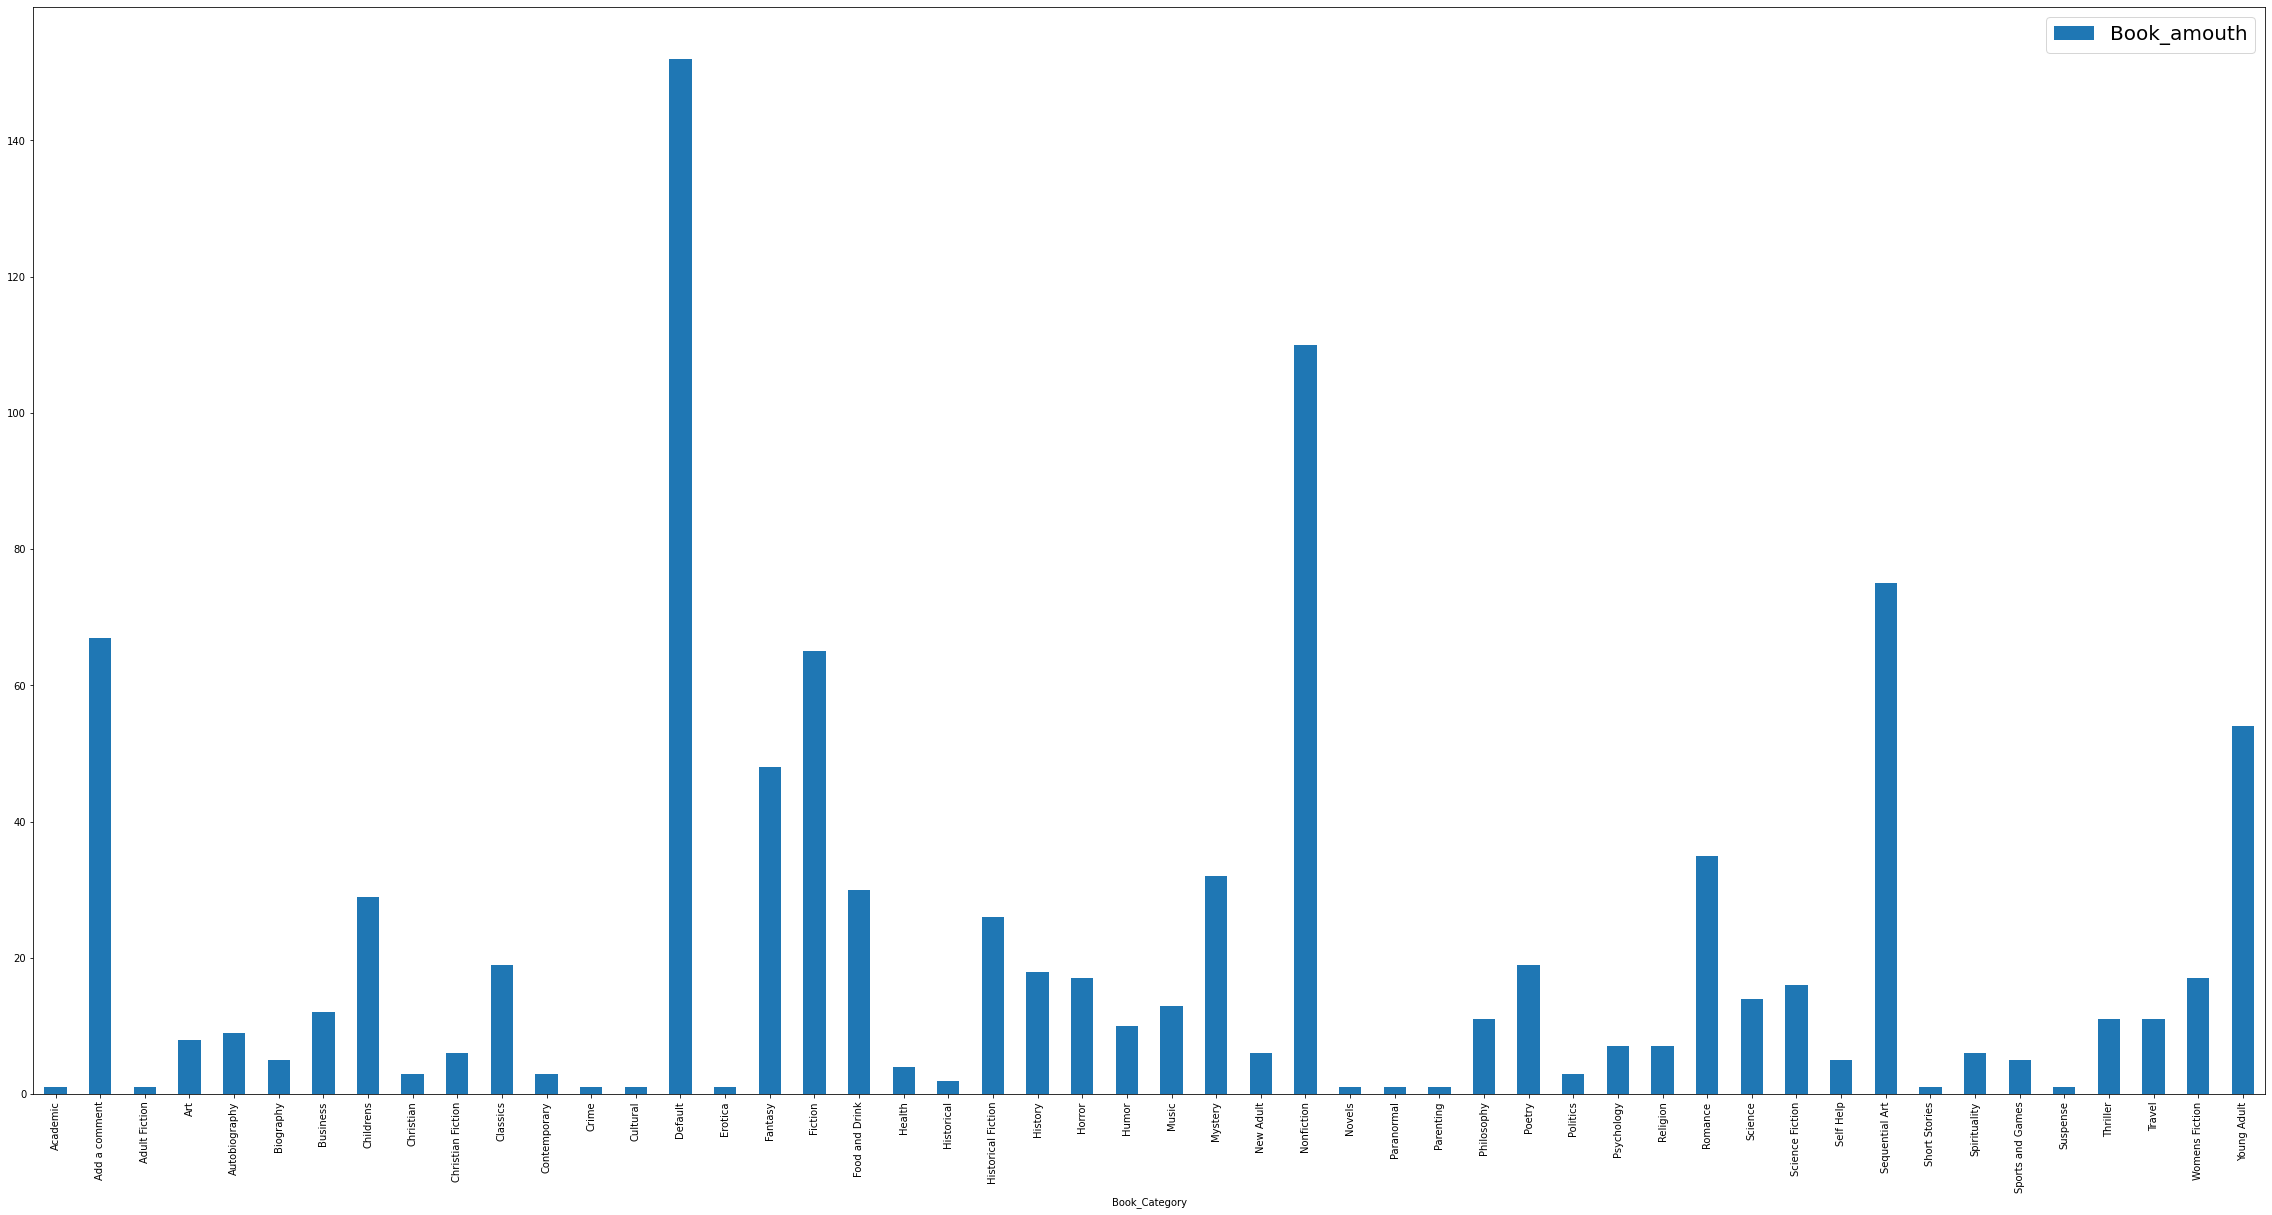

In [66]:
df2_Category_MeanPrice_Amouth.plot.bar(y='Book_amouth')

In [67]:
# create plot
# OX - Mean_Books_Price
# OY - the number of books on this subject

<AxesSubplot:xlabel='Book_Category'>

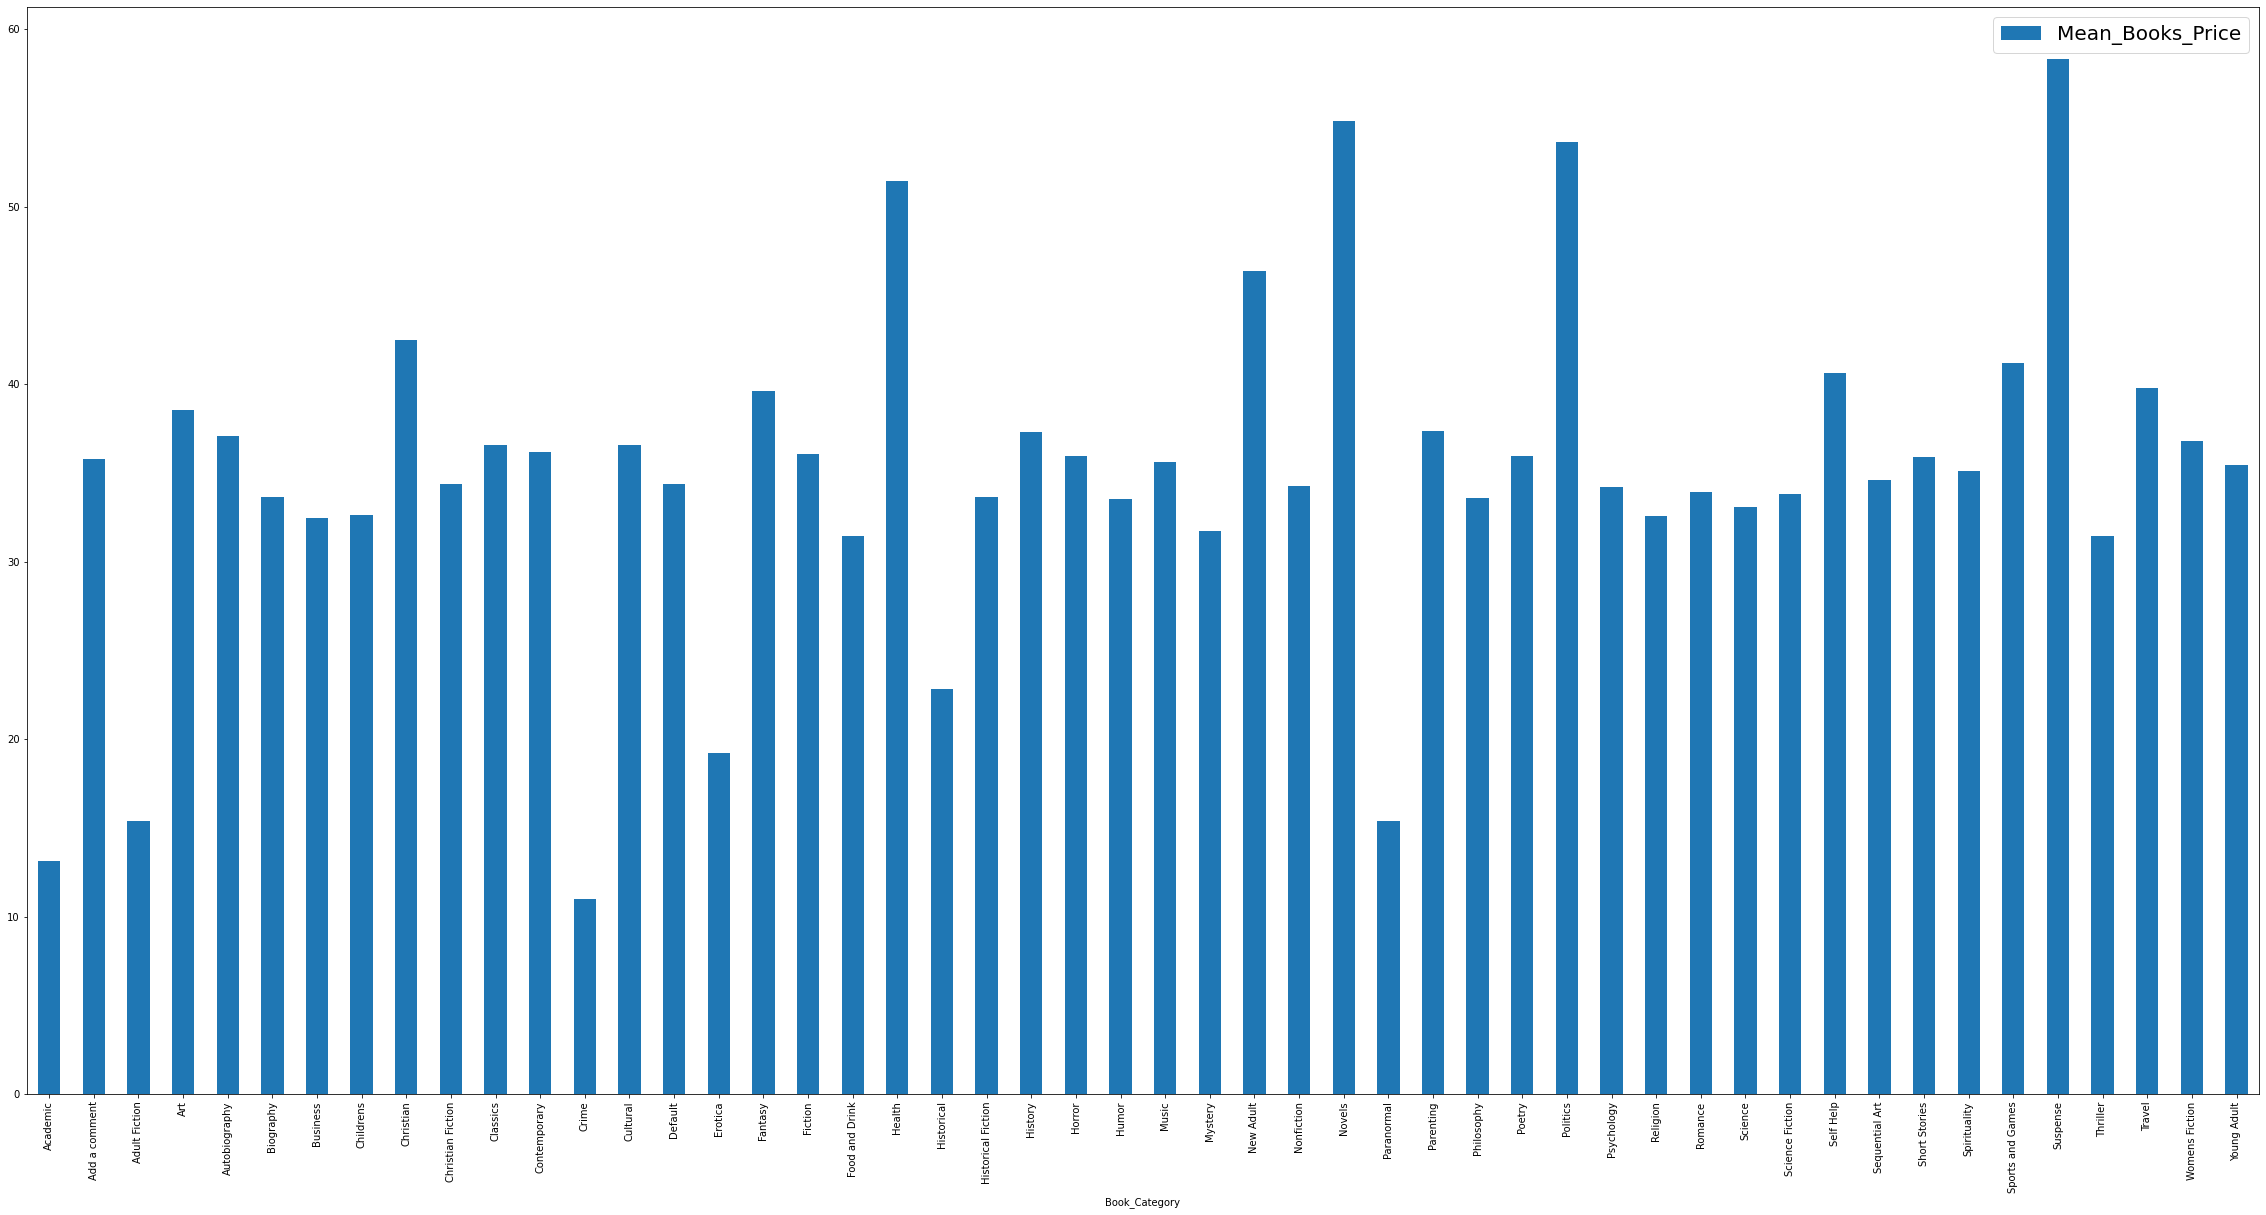

In [68]:
df2_Category_MeanPrice_Amouth.plot.bar(y='Mean_Books_Price')

In [69]:
# only books with more than 50 items in stock

In [70]:
book_amouth_more_than_50 = df2_Category_MeanPrice_Amouth.loc[df2_Category_MeanPrice_Amouth["Book_amouth"]>50]
book_amouth_more_than_50

,Mean_Books_Price,Book_amouth
Book_Category,,
Add a comment,35.796418,67
Default,34.392697,152
Fiction,36.066615,65
Nonfiction,34.260182,110
Sequential Art,34.572267,75
Young Adult,35.449074,54


In [71]:
# only 2 kol - >  kol Book_amouth and Book_Category

In [72]:
book_amouth_more_than_50.iloc[0:6, 1:2]

,Book_amouth
Book_Category,
Add a comment,67
Default,152
Fiction,65
Nonfiction,110
Sequential Art,75
Young Adult,54


In [73]:
# showing on a circle chart the percentage distribution of individual categories - selected earlier

In [74]:
list_book_cat_and_amouth=book_amouth_more_than_50.iloc[0:6, 1:2]

array([<AxesSubplot:ylabel='Book_amouth'>], dtype=object)

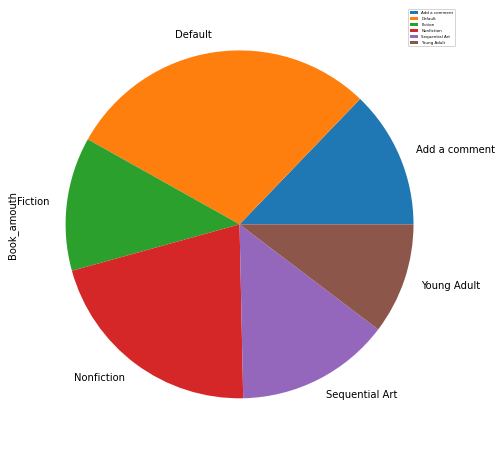

In [75]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rc('legend',fontsize=4)
list_book_cat_and_amouth.plot.pie(subplots=True)

----

In [76]:
# wygeneruj pytanie - inetersuje mnie min , max i sr cena ksiazek , z uwzglednieniem kategori 

In [77]:
# sztucznie doloz dwie kolmny (kopie kolumny price) i je inaczej nazwij 

In [78]:
df_2_copy=df.copy()

In [79]:
df_2_extra_copy_kol_price=df_2_copy[[cols_name[3],cols_name[2],cols_name[1],cols_name[1],cols_name[1],cols_name[0],cols_name[4]]]

In [80]:
df_2_extra_copy_kol_price.head(2)

,Book_Title,Book_Stars,Book_Price,Book_Price,Book_Price,Book_Category,Book_total_category_amouth
0,It's Only the Himalayas,2,45.17,45.17,45.17,Travel,11
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,4,49.43,49.43,49.43,Travel,11


In [81]:
#rename 2 kolumn

In [82]:
#df_2_copy[[cols_name[3],cols_name[2],cols_name[1],cols_name[1],cols_name[1],cols_name[0],cols_name[4]]]=df_2_copy['Book_Title','Book_Stars','Book_Price','Book_Price_copy1','Book_Price_copy2','']

In [83]:
df_2_extra_copy_kol_price.columns

Index(['Book_Title', 'Book_Stars', 'Book_Price', 'Book_Price', 'Book_Price',
       'Book_Category', 'Book_total_category_amouth'],
      dtype='object')

In [84]:
df_2_extra_copy_kol_price.columns = ['Book_Title','Book_Stars', 'Book_Price', 'Book_Price_copy1', 'Book_Price_copy2','Book_Category','Book_total_category_amouth']

In [85]:
df_2_extra_copy_kol_price.head(2)

,Book_Title,Book_Stars,Book_Price,Book_Price_copy1,Book_Price_copy2,Book_Category,Book_total_category_amouth
0,It's Only the Himalayas,2,45.17,45.17,45.17,Travel,11
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,4,49.43,49.43,49.43,Travel,11


In [86]:
# teraz gdy mam indywidualne nazwy moge rownoczenie wygenerowac min i max

In [87]:
# znajdz sr cene 1 ks w kazdej kat tematycznej i podaj il ksiazek w kazdej kat

#SELECT Book_Category, avg(Book_Price),count(*),min(Book_Price),max(Book_Price)
#FROM df
#GROUP BY Book_Category;

In [88]:
df_2_extra_copy_kol_price.groupby("Book_Category").agg(
    {"Book_Price": np.mean, 
     "Book_Category": np.size,
     "Book_Price_copy1": np.min,
     "Book_Price_copy2": np.max,
    })[:10] #first ten

,Book_Price,Book_Category,Book_Price_copy1,Book_Price_copy2
Book_Category,,,,
Academic,13.120000,1,13.12,13.12
Add a comment,35.796418,67,10.02,59.15
Adult Fiction,15.360000,1,15.36,15.36
Art,38.520000,8,10.29,49.05
Autobiography,37.053333,9,10.93,59.04
Biography,33.662000,5,16.85,48.19
Business,32.460000,12,12.61,51.74
Childrens,32.638276,29,10.62,58.08
Christian,42.496667,3,25.77,54.00


In [89]:
tab_MeanPrice_Category_MinPrice_MaxPrice=df_2_extra_copy_kol_price.groupby("Book_Category").agg(
    {"Book_Price": np.mean, 
     "Book_Category": np.size,
     "Book_Price_copy1": np.min,
     "Book_Price_copy2": np.max,
    })

In [90]:
tab_Min_Max_Mean_Price_Amouth = tab_MeanPrice_Category_MinPrice_MaxPrice.rename(columns =
                                                {'Book_Price': 'Mean_Books_Price',
                                                 'Book_Category': 'Book_amouth',
                                                 'Book_Price_copy1': 'Min_Price',
                                                 'Book_Price_copy2': 'Max_Price'}, inplace = False)

In [91]:
tab_Min_Max_Mean_Price_Amouth.head(2)

,Mean_Books_Price,Book_amouth,Min_Price,Max_Price
Book_Category,,,,
Academic,13.120000,1,13.12,13.12
Add a comment,35.796418,67,10.02,59.15


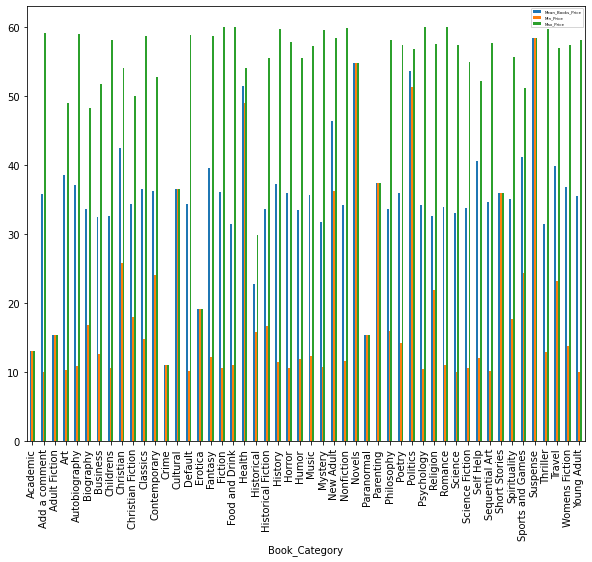

In [92]:
tab_Min_Max_Mean_Price_Amouth.plot.bar(y=['Mean_Books_Price','Min_Price','Max_Price' ])
figsize=(40, 40)


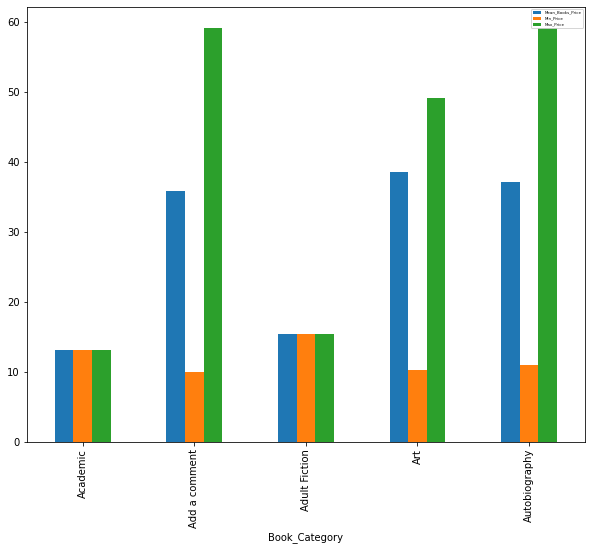

In [93]:
tab_Min_Max_Mean_Price_Amouth[:5].plot.bar(y=['Mean_Books_Price','Min_Price','Max_Price' ]) #first 5
figsize=(40, 40)

In [94]:
# read value min max for Category - Add a comment - rows =1 :

In [95]:
single_category_Add_a_comment_tab_Min_Max_Mean_Price_Amouth= tab_Min_Max_Mean_Price_Amouth.iloc[1]
single_category_Add_a_comment_tab_Min_Max_Mean_Price_Amouth

Mean_Books_Price    35.796418
Book_amouth         67.000000
Min_Price           10.020000
Max_Price           59.150000
Name: Add a comment, dtype: float64

<AxesSubplot:>

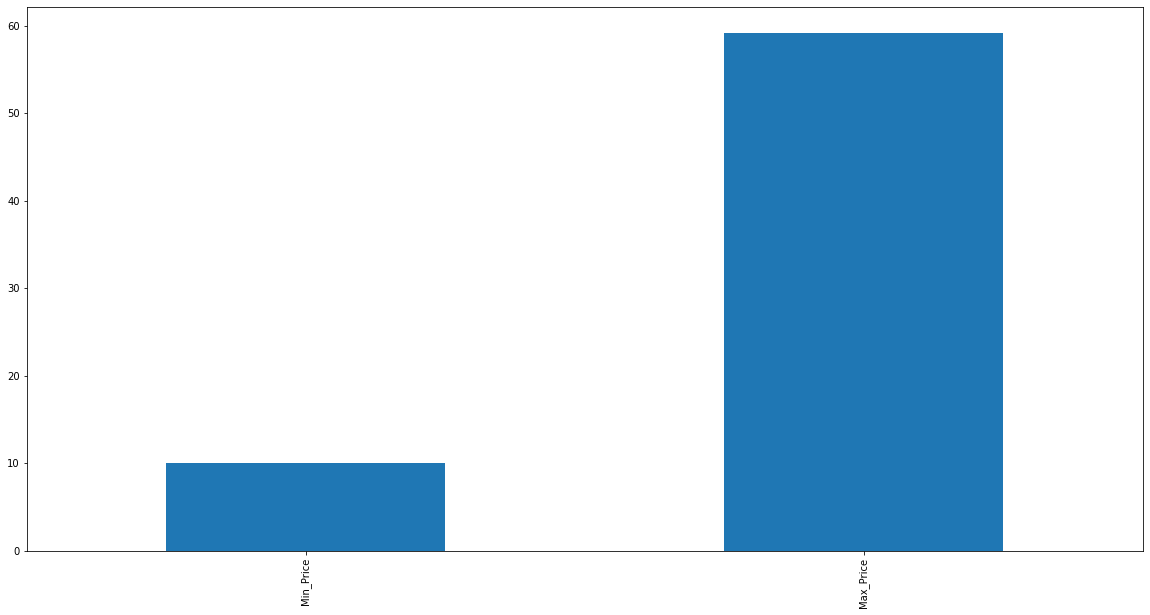

In [96]:
plt.rc('legend',fontsize=8)
plt.rcParams['figure.figsize'] = [20, 10]
single_category_Add_a_comment_tab_Min_Max_Mean_Price_Amouth[2:4].plot.bar(y=
                                                                     ['Min_Price',
                                                                      'Max_Price']) 
# chce tylko zobaczyc max i min stad single_category_Add_a_comment_tab_Min_Max_Mean_Price_Amouth[2:4]

i need change the size my plot - source --> https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger

In [97]:
a.head(5)

Book_Price           
                               size       mean
Book_Stars Book_Category                      
1          Add a comment       16.0  36.356875
           Autobiography        2.0  34.015000
           Biography            1.0  39.550000
           Business             3.0  43.930000
           Childrens            8.0  32.593750

----

change color to visualisation min and max Book_Stars

In [98]:
def color_1star_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val == 1 or val==2 else 'black'
    return 'color: %s' % color

In [99]:
color_value_1_star_styling = df[:5].style.applymap(color_1star_red)# first 5
color_value_1_star_styling

,Book_Title,Book_Stars,Book_Price,Book_Category,Book_total_category_amouth
0,It's Only the Himalayas,2,45.170000,Travel,11
1,Full Moon over Noah’s Ark: An Odyssey to Mount Ararat and Beyond,4,49.430000,Travel,11
2,See America: A Celebration of Our National Parks & Treasured Sites,3,48.870000,Travel,11
3,Vagabonding: An Uncommon Guide to the Art of Long-Term World Travel,2,36.940000,Travel,11
4,Under the Tuscan Sun,3,37.330000,Travel,11


In [100]:
def color_1star_red_5star_blue(val):
    if val == 1:
        color = 'red' 
    elif val == 5:
        color = 'blue' 
    else:
        color = 'yellow'
    return 'color: %s' % color

In [101]:
color_value_1_star_styling = df[:15].style.applymap(color_1star_red_5star_blue) #first 15
color_value_1_star_styling

,Book_Title,Book_Stars,Book_Price,Book_Category,Book_total_category_amouth
0,It's Only the Himalayas,2,45.170000,Travel,11
1,Full Moon over Noah’s Ark: An Odyssey to Mount Ararat and Beyond,4,49.430000,Travel,11
2,See America: A Celebration of Our National Parks & Treasured Sites,3,48.870000,Travel,11
3,Vagabonding: An Uncommon Guide to the Art of Long-Term World Travel,2,36.940000,Travel,11
4,Under the Tuscan Sun,3,37.330000,Travel,11
5,A Summer In Europe,2,44.340000,Travel,11
6,The Great Railway Bazaar,1,30.540000,Travel,11
7,A Year in Provence (Provence #1),4,56.880000,Travel,11
8,The Road to Little Dribbling: Adventures of an American in Britain (Notes From a Small Island #2),1,23.210000,Travel,11
9,Neither Here nor There: Travels in Europe,3,38.950000,Travel,11


In [102]:
# filter two columns and then sort data by Stars kolumn and then by Book_Price

In [103]:
Book_Stars_and_Book_Price=df.filter(items=['Book_Stars', 'Book_Price'])

In [104]:
sorted_by_stars=Book_Stars_and_Book_Price.sort_values(by=['Book_Stars','Book_Price']) 

In [105]:
sorted_by_stars.head(5) # first 5

,Book_Stars,Book_Price
840,1,10.40
315,1,10.62
605,1,10.65
18,1,10.69
474,1,10.76


----

#### subject 9a:  I want to group my categories according to the number of stars, and then calculate how many such books are in each item, and what is the average price of them. For example I want to count the number of books and their average price for the "Autobiography" catalog for 1 Book_stars

In [106]:
# SELECT Book_Stars,  COUNT(*), AVG(Book_Price)
#FROM df
#GROUP BY Book_Stars, Book_Category;

In [107]:
import numpy as np
a=df.groupby(["Book_Stars", "Book_Category"]).agg({"Book_Price": [np.size, np.mean]})
a.head(45) # only 45 first result 


Book_Price           
                                    size       mean
Book_Stars Book_Category                           
1          Add a comment            16.0  36.356875
           Autobiography             2.0  34.015000
           Biography                 1.0  39.550000
           Business                  3.0  43.930000
           Childrens                 8.0  32.593750
           Christian                 1.0  25.770000
           Classics                  3.0  40.523333
           Contemporary              2.0  27.905000
           Crime                     1.0  10.970000
           Cultural                  1.0  36.580000
           Default                  33.0  33.662424
           Fantasy                   9.0  37.460000
           Fiction                  13.0  36.896923
           Food and Drink            7.0  35.384286
           Historical                1.0  15.790000
           Historical Fiction        5.0  40.866000
           History                   3.0  34.963333
           Horror                    4.0  37.072500
           Humor                     2.0  34.810000
           Music                     2.0  28.215000
           Mystery                   7.0  20.844286
           New Adult                 1.0  55.850000
           Nonfiction               24.0  35.739167
           Paranormal                1.0  15.400000
           Philosophy                6.0  36.971667
           Poetry                    3.0  39.026667
           Politics                  1.0  56.860000
           Psychology                4.0  25.502500
           Religion                  1.0  27.620000
           Romance                  11.0  32.463636
           Science                   4.0  37.830000
           Science Fiction           7.0  35.237143
           Self Help                 2.0  46.190000
           Sequential Art           13.0  36.420000
           Short Stories             1.0  35.880000
           Spirituality              1.0  20.910000
           Sports and Games          1.0  24.420000
           Thriller                  3.0  22.616667
           Travel                    2.0  26.875000
           Womens Fiction            5.0  34.072000
           Young Adult              11.0  37.200909
2          Academic                  1.0  13.120000
           Add a comment            13.0  39.225385
           Art                       1.0  32.340000
           Autobiography             3.0  26.800000

In [108]:
# for each category, visualize the average price and number of books

<Figure size 1440x720 with 0 Axes>

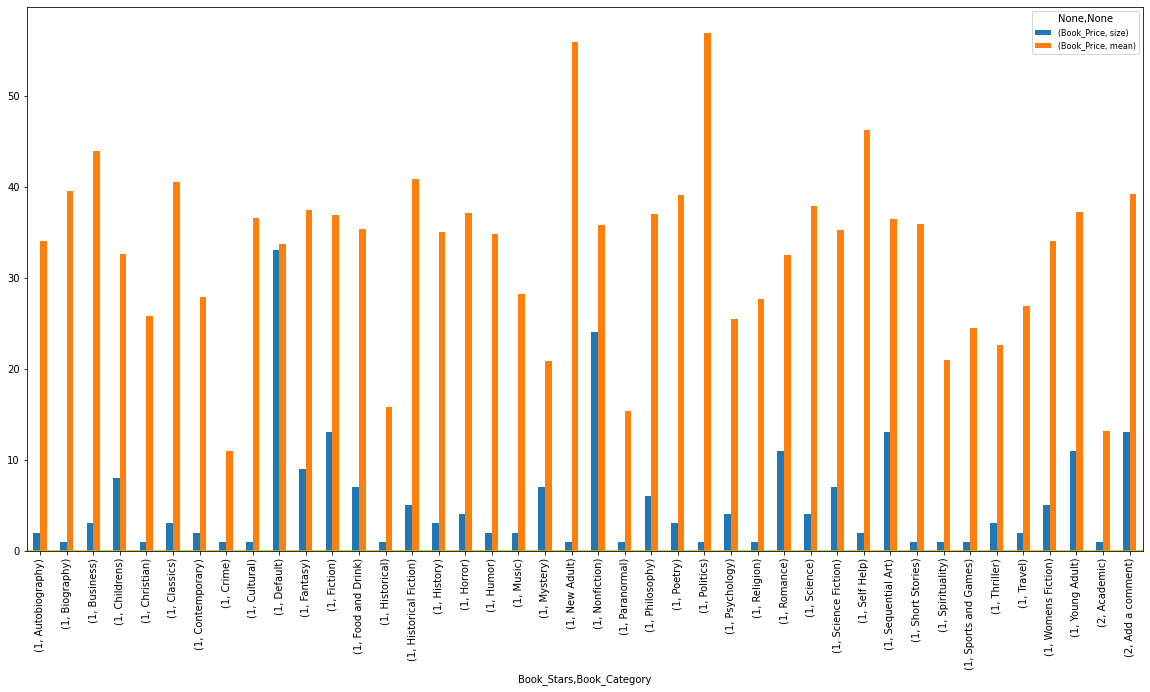

In [109]:
plt.figure();

a.iloc[1:43].plot.bar();

plt.axhline(0, color="y");

<Figure size 1440x720 with 0 Axes>

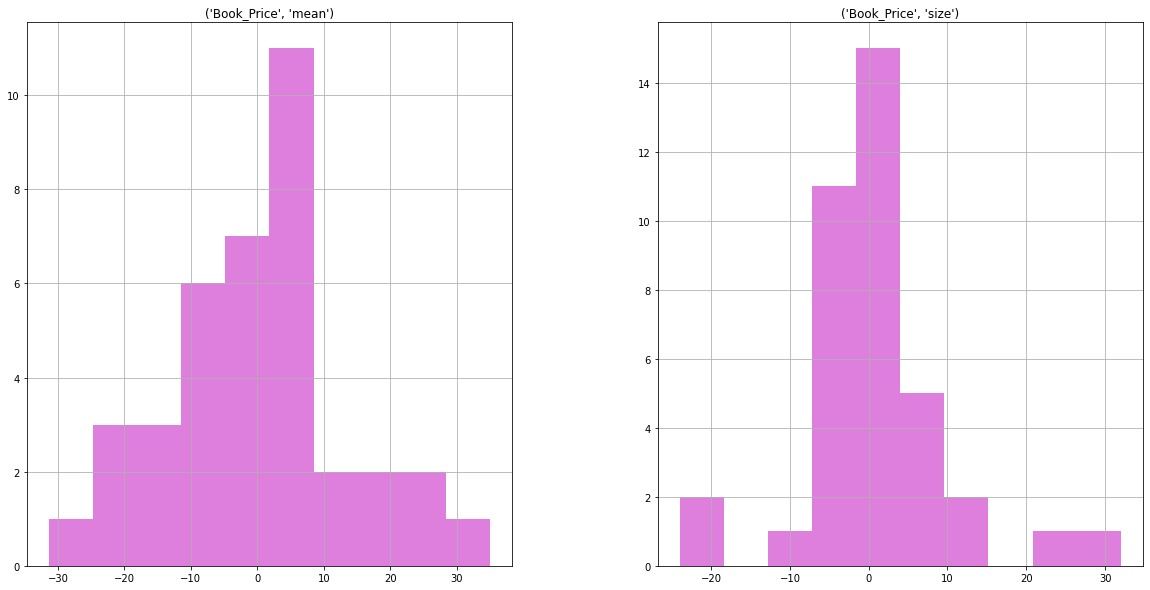

In [110]:
# Histogram
plt.figure();
# only 1 stars 
a.iloc[1:40].diff().hist(color="m", alpha=0.5, bins=10);

In [112]:
a.head(50)
list(a.columns)

[('Book_Price', 'size'), ('Book_Price', 'mean')]